# Семинар 5. Собственные векторы и значения. QR алгоритм

## Экспериментально посмотрим на сходимость степенного метода

$$x_{k+1} = \frac{Ax_k}{\|Ax_k\|} $$

- Теретическая скорость сходимости **линейная** с фактором $\frac{|\lambda_2|}{|\lambda_1|}$

In [141]:
import numpy as np

def power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv = [x]
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        conv.append(x)
        eigval = x @ (A @ x)
        res = A @ x - eigval * x
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv

### Симметричная положительно определённая матрица

In [142]:
np.random.seed(0)
n = 10
A = np.random.randn(n, n)
A = A.T @ A

true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[5.46932050e-04 2.09137477e-01 1.74525765e+00 3.23931380e+00
 4.62433454e+00 6.26216211e+00 1.22375642e+01 1.72696906e+01
 2.62484029e+01 3.01039516e+01]
[[ 0.04603519  0.22277899 -0.29375905  0.08832539 -0.34099119  0.29777117
  -0.38061571  0.52626195  0.39471112 -0.26757249]
 [ 0.59120246  0.18977691  0.41516513  0.33462191 -0.23211341 -0.13887814
   0.19411491  0.21041415  0.13690458  0.39530888]
 [-0.29728526 -0.61368064  0.14042621  0.42201257  0.12367325  0.11383957
  -0.25550594  0.02315929  0.36186728  0.33493482]
 [ 0.06099979 -0.00270835  0.09448934  0.06287588  0.19065382 -0.05405822
   0.45517374 -0.22822681  0.67129831 -0.48394925]
 [-0.35552666  0.44300389  0.05975846 -0.16814609 -0.19384699  0.45116597
   0.14433723 -0.3285905   0.25430703  0.45923824]
 [-0.25227101  0.27201389 -0.19057676  0.39169443  0.50806048  0.13346877
   0.39666586  0.44927668 -0.17320354  0.08655395]
 [-0.00693167 -0.26956029 -0.13432045 -0.64789637  0.04462194 -0.1763598
   0.28017023  0.456249

In [143]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 100, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.26757266 -0.39530882 -0.33493466  0.48394955 -0.45923813 -0.08655403
 -0.32573631  0.07478234 -0.20636191 -0.23037877]
30.103951632613033


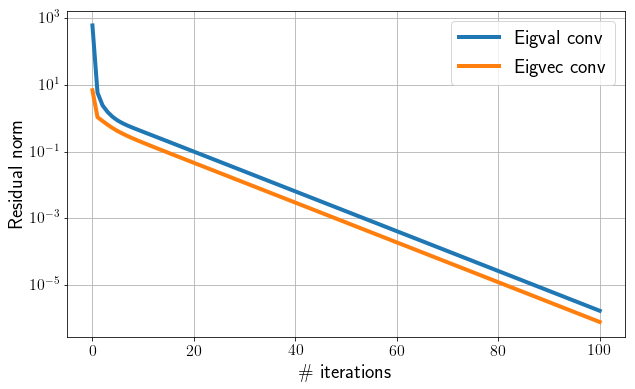

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")
power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, -1] * true_eigvec[:, -1]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [147]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
print(true_eigvals[-2] / true_eigvals[-1])

[0.00979779 0.4147145  0.63196387 0.71361778 0.77770908 0.82473757
 0.85176477 0.86477979 0.87033316 0.87243497 0.87306812 0.87312327
 0.87297913 0.87278868 0.87260877 0.87245674 0.87233452 0.87223871
 0.87216461 0.87210773 0.87206423 0.87203106 0.87200579 0.87198656
 0.87197193 0.8719608  0.87195234 0.8719459  0.87194101 0.87193729
 0.87193446 0.87193231 0.87193068 0.87192943 0.87192849 0.87192777
 0.87192723 0.87192681 0.87192649 0.87192625 0.87192607 0.87192593
 0.87192583 0.87192575 0.87192569 0.87192564 0.87192561 0.87192558
 0.87192556 0.87192554 0.87192553 0.87192552 0.87192552 0.87192551
 0.87192551 0.8719255  0.8719255  0.8719255  0.8719255  0.8719255
 0.8719255  0.8719255  0.87192549 0.87192549 0.87192549 0.87192549
 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549
 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549
 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549
 0.87192549 0.87192549 0.87192549 0.87192549 0.87192549 0.87192

### Симметричная матрица

- Покажем, что собственные значений вещественные
    - $Ax = \lambda x$
    - Умножим слева на $x^*$: $x^* A x = \lambda \|x\|^2_2$
    - Возьмём сопряжение от обеих частей: $x^* A^* x = \lambda^* \|x\|_2^2$
    - В силу эрмитовости: $x^* A x = \lambda^* \|x\|_2^2$
    - Сравнивая со вторым равенством, получаем $\lambda^* = \lambda$
    - Значит собственные значения действительные

In [148]:
A = np.random.randn(n, n)
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(true_eigvec)

[ 6.62879693  6.19592717  4.62087884 -5.14917388 -4.87814935  2.49567139
 -3.00612741  0.57798648 -0.41729391 -1.49129953]
[[-0.25147976 -0.23670365  0.86176608  0.08440629 -0.29540898 -0.05507287
   0.08780126 -0.17243276 -0.05019424 -0.02651484]
 [-0.03824519 -0.21022621  0.07866074 -0.62888752  0.21790362  0.38148868
  -0.26312368 -0.12841042  0.03177624 -0.52240462]
 [ 0.12986039 -0.24441323 -0.22086908  0.11359438 -0.56553219 -0.09397921
   0.1210989   0.055416    0.57844555 -0.42510909]
 [-0.46781849 -0.20320249 -0.16468182  0.19417503  0.19931418  0.54645325
   0.54682975 -0.06454983  0.15949809  0.08980075]
 [-0.21945776  0.16661199  0.02156746  0.30980099 -0.25947173  0.40385419
  -0.35565992  0.59522573 -0.26317303 -0.21717608]
 [ 0.0791815  -0.69654711 -0.17831061  0.40524246  0.11063831  0.02178492
  -0.45127239 -0.24854755 -0.15568876  0.10079297]
 [ 0.06520582 -0.1424913   0.24928913  0.23566447  0.62988962 -0.28670635
   0.06838161  0.46828086  0.28385792 -0.27251023]
 [

In [149]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.25147925 -0.03824474  0.12986092 -0.46781805 -0.21945812  0.07918302
  0.06520613  0.06549197  0.7858972   0.1377341 ]
6.6287969292517985


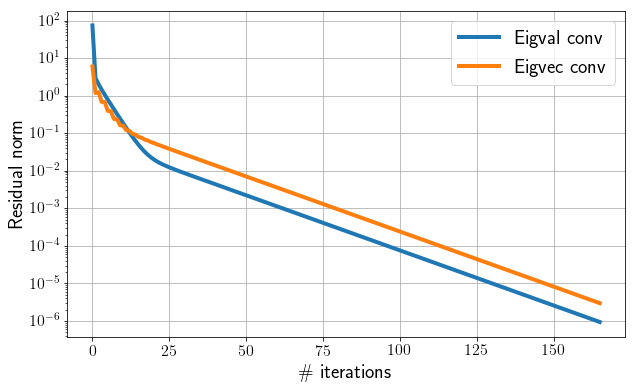

In [150]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [151]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.03952484 0.69133472 0.71479898 0.73236771 0.7406077  0.74411375
 0.74600766 0.74765285 0.74959946 0.75213906 0.75554147 0.76014769
 0.76639718 0.77480257 0.78585223 0.79982235 0.81653022 0.83515648
 0.85431609 0.87243736 0.88825681 0.90112835 0.9110173  0.91828845
 0.92346719 0.92707498 0.92955154 0.93123551 0.93237387 0.93314075
 0.93365639 0.93400276 0.93423529 0.93439132 0.93449596 0.93456604
 0.9346129  0.93464414 0.93466488 0.93467857 0.93468751 0.93469328
 0.93469694 0.93469919 0.93470051 0.93470122 0.93470154 0.93470162
 0.93470154 0.93470138 0.93470118 0.93470095 0.93470072 0.9347005
 0.93470029 0.9347001  0.93469992 0.93469977 0.93469963 0.9346995
 0.93469939 0.93469929 0.93469921 0.93469913 0.93469906 0.934699
 0.93469895 0.93469891 0.93469887 0.93469883 0.9346988  0.93469878
 0.93469875 0.93469873 0.93469872 0.9346987  0.93469869 0.93469868
 0.93469867 0.93469866 0.93469865 0.93469864 0.93469864 0.93469863
 0.93469863 0.93469862 0.93469862 0.93469862 0.93469861 0.93469861

## Несимметричная матрица

In [152]:
A = np.random.randn(n, n)

true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[-3.31230609+0.j         -1.68659284+2.3923518j  -1.68659284-2.3923518j
 -2.04770579+1.42949084j -2.04770579-1.42949084j  2.57567072+0.32135644j
  2.57567072-0.32135644j  0.18836618+0.5991999j   0.18836618-0.5991999j
  1.14829067+0.j        ]
[3.31230609 2.92710481 2.92710481 2.49730717 2.49730717 2.59564051
 2.59564051 0.62811013 0.62811013 1.14829067]
[[-5.16064164e-01+0.j         -1.46782641e-01+0.04809295j
  -1.46782641e-01-0.04809295j  1.60869677e-01-0.06284383j
   1.60869677e-01+0.06284383j -1.94462598e-01+0.01732381j
  -1.94462598e-01-0.01732381j -1.89745622e-01+0.16091343j
  -1.89745622e-01-0.16091343j -8.19608793e-03+0.j        ]
 [-3.75145608e-01+0.j          1.80255462e-04+0.06607704j
   1.80255462e-04-0.06607704j -1.73202194e-01-0.35006257j
  -1.73202194e-01+0.35006257j  1.05007499e-01+0.10601976j
   1.05007499e-01-0.10601976j -5.17396386e-01+0.j
  -5.17396386e-01-0.j          5.35019470e-01+0.j        ]
 [-2.46578003e-01+0.j          3.03556306e-01+0.28737063j
   3.0355630

In [153]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.51606412 -0.37514559 -0.24657809  0.30003883 -0.58513647 -0.21112333
 -0.13872184  0.15043685  0.10949419  0.03602553]
-3.312305985835179


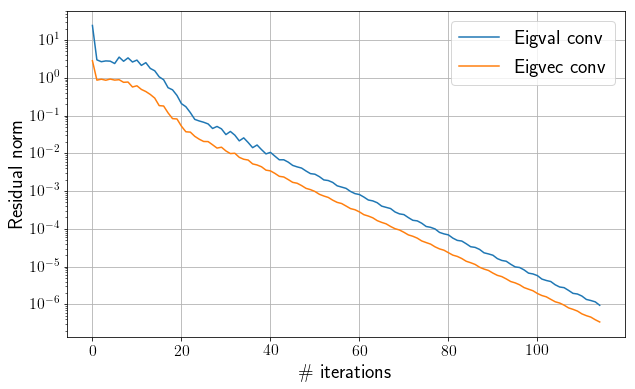

In [154]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [155]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.12268921 0.893738   1.04991637 0.98510177 0.86562925 1.47972902
 0.7763473  1.22886176 0.77718516 1.12391615 0.72342268 1.18281374
 0.70362548 0.86574467 0.6909665  0.83765684 0.61557902 0.87921787
 0.70931201 0.60672626 0.82827704 0.69919793 0.66133888 0.90764942
 0.92446497 0.90342115 0.75714576 1.13222961 0.86243588 0.70613562
 1.20981774 0.7988909  0.70520315 1.20146969 0.75191165 0.73088125
 1.17725629 0.75435138 0.77114206 1.09760707 0.79517389 0.79843375
 1.00199023 0.86640326 0.81941177 0.91400611 0.92972323 0.83619783
 0.85159925 0.96593122 0.86177781 0.81942439 0.96151948 0.89202331
 0.81291634 0.92578722 0.92411826 0.82816192 0.87738563 0.94574834
 0.85711737 0.83559065 0.94810962 0.89391579 0.81301546 0.9269446
 0.92977416 0.81289858 0.88923466 0.95636254 0.83292677 0.84905501
 0.96438337 0.86655313 0.82008692 0.94914204 0.90586478 0.81029181
 0.91393518 0.94108444 0.82068701 0.8705309  0.96206794 0.84761551
 0.83333823 0.9605626  0.88441982 0.81288305 0.93522921 0.92265

In [156]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.12268921 0.893738   1.04991637 0.98510177 0.86562925 1.47972902
 0.7763473  1.22886176 0.77718516 1.12391615 0.72342268 1.18281374
 0.70362548 0.86574467 0.6909665  0.83765684 0.61557902 0.87921787
 0.70931201 0.60672626 0.82827704 0.69919793 0.66133888 0.90764942
 0.92446497 0.90342115 0.75714576 1.13222961 0.86243588 0.70613562
 1.20981774 0.7988909  0.70520315 1.20146969 0.75191165 0.73088125
 1.17725629 0.75435138 0.77114206 1.09760707 0.79517389 0.79843375
 1.00199023 0.86640326 0.81941177 0.91400611 0.92972323 0.83619783
 0.85159925 0.96593122 0.86177781 0.81942439 0.96151948 0.89202331
 0.81291634 0.92578722 0.92411826 0.82816192 0.87738563 0.94574834
 0.85711737 0.83559065 0.94810962 0.89391579 0.81301546 0.9269446
 0.92977416 0.81289858 0.88923466 0.95636254 0.83292677 0.84905501
 0.96438337 0.86655313 0.82008692 0.94914204 0.90586478 0.81029181
 0.91393518 0.94108444 0.82068701 0.8705309  0.96206794 0.84761551
 0.83333823 0.9605626  0.88441982 0.81288305 0.93522921 0.92265

### Если $\lambda^*_2 = \lambda_1$, то степенной метод осциллирует и не сходится! 

### Другие проблемные случаи

1) $\lambda_1 = \lambda_2$

2) $\lambda_1 = -\lambda_2$

### Если $\lambda_1 = \lambda_2$ 

In [157]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, 2] + list(np.random.rand(n - 2))) @ Q.T

In [158]:
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[0.13346147 0.2277595  0.41030156 0.98058013 0.88696078 0.87178573
 0.62329467 0.61882617 2.         2.        ]
[0.13346147 0.2277595  0.41030156 0.98058013 0.88696078 0.87178573
 0.62329467 0.61882617 2.         2.        ]
[[ 0.14007534 -0.11101618  0.28364577 -0.0822732  -0.38076019 -0.18820887
  -0.61677758  0.29970492 -0.47978327  0.07686287]
 [-0.46460413 -0.37878239  0.23567624  0.53802219 -0.07672895  0.20911706
   0.28355453  0.1736809  -0.27809277  0.28254847]
 [ 0.11145622  0.02156938  0.08857004 -0.30563892  0.23033582  0.47247737
   0.28165119  0.35245221 -0.37772366 -0.446024  ]
 [ 0.63901669  0.3106327   0.06640218  0.56145156  0.22857323  0.24569504
  -0.07833419  0.05738222 -0.08356597  0.22624984]
 [ 0.33999813 -0.02447311 -0.07781692  0.06955944 -0.29073207 -0.52987793
   0.59065207 -0.13657466 -0.35903539 -0.04686836]
 [ 0.2396065  -0.62958207  0.1020399   0.25372894  0.27252786 -0.24520148
  -0.11910089  0.10795619  0.3329002  -0.4951743 ]
 [ 0.12554431 -0.1915778

In [159]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.45183471  0.18080187  0.52830874  0.00617068  0.37368748 -0.16296259
  0.08926022  0.40996939 -0.31437518 -0.20720689]
1.9999999999992815


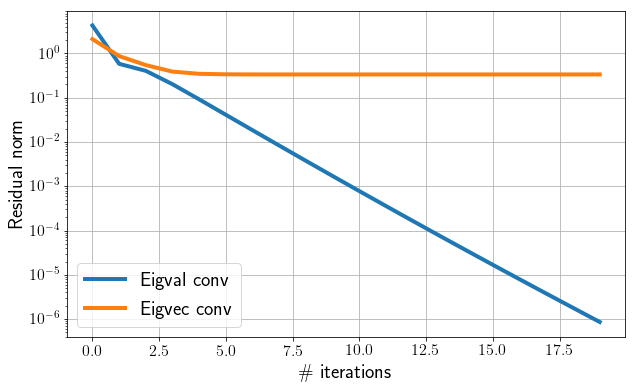

In [161]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [162]:
alpha = np.linalg.lstsq(true_eigvec[:, n-2:], max_eigvec, rcond=None)[0]

In [163]:
print("Accuracy = {}".format(np.linalg.norm(true_eigvec[:, n-2:] @ alpha - max_eigvec)))

Accuracy = 8.327254275580149e-07


### Если $\lambda_1 = -\lambda_2$

In [164]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, -2] + list(np.random.rand(n - 2))) @ Q.T

In [165]:
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[-2.          2.          0.02895255  0.92721181  0.89569129  0.7814796
  0.75102165  0.52823409  0.43298421  0.34944029]
[2.         2.         0.02895255 0.92721181 0.89569129 0.7814796
 0.75102165 0.52823409 0.43298421 0.34944029]
[[-0.39514866  0.14705131 -0.05832296 -0.25939553  0.74538659 -0.25773903
  -0.08385262  0.13896124  0.32120408  0.00131151]
 [-0.61188545 -0.15073183 -0.38006998 -0.00406517 -0.189871    0.24938246
   0.35386316 -0.0362767  -0.00921283  0.48326367]
 [-0.06873765 -0.30878576  0.40720793  0.33462891 -0.10158507  0.03462735
  -0.40985728  0.05702373  0.53121953  0.39646465]
 [-0.53409724  0.42407998 -0.02074549  0.34281106 -0.21796466 -0.03139165
  -0.40720676 -0.26904568 -0.08598039 -0.35050952]
 [-0.11371005  0.48650914  0.63655661 -0.26666532 -0.15436391  0.22620922
   0.4024255  -0.01464323  0.18858693  0.03660056]
 [-0.03770828 -0.21171354  0.00683586  0.49864657  0.28315111  0.44733255
   0.36963109  0.09629793  0.2131427  -0.48316574]
 [-0.1868556  -0

In [166]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.13577128 -0.16804629 -0.31061313  0.40874262  0.48308402 -0.21269893
 -0.52995847  0.16702779  0.30871141 -0.08430634]
1.996774615757766


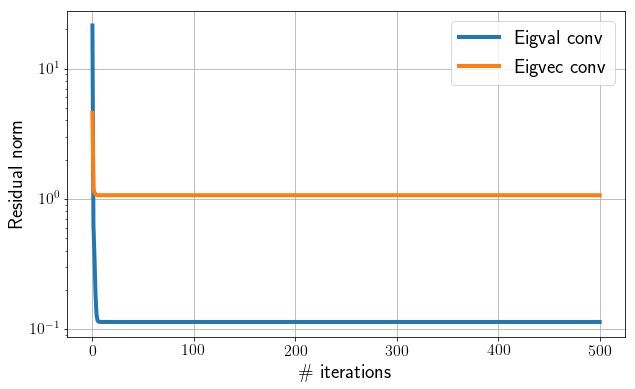

In [168]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

## Блочный степенной метод

- Ищем $k$ cтарших собственных значения и вектора
- Этапы аналогичны степенному методу для максимального по модулю собственного значения
    - Умножение матрицы на набор векторов
    - Аналог нормализации для матриц?

In [169]:
def block_power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv_vec = [x]
    conv_val = [np.einsum('ik,ij,jk->k',x, A, x)]
    for i in range(max_iter):
        x = A @ x
        x, _ = np.linalg.qr(x)
        conv_vec.append(x)
        eigval = np.einsum('ik,ij,jk->k',x, A, x)
        conv_val.append(eigval)
        res = A @ x - (eigval[:, np.newaxis] * x.T).T
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv_vec, conv_val

### Немного про einsum

In [181]:
A = np.random.randn(n, n)
print(np.trace(A), np.einsum('ii', A))
print(np.diag(A) - np.einsum("ii->i", A))

4.415950293804806 4.415950293804805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [185]:
x = np.random.randn(n)
print(A @ x - np.einsum('ij,j', A, x))

[ 0.00000000e+00  0.00000000e+00 -1.35308431e-16  4.44089210e-16
 -8.88178420e-16  8.88178420e-16  5.27355937e-16  0.00000000e+00
  0.00000000e+00  8.88178420e-16]


In [187]:
B = np.random.randn(n, n)
print(np.diag(A @ B) - np.einsum('ij,ji->i', A, B))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  2.77555756e-17
 -4.44089210e-16 -1.11022302e-15]


### Более подробное об этой операции см. [тут](https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/)

## Вернёмся к блочному степенному методу

In [170]:
block_size = 3
A = np.random.randn(n, n)
A = A.T @ A
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[6.15977368e-05 4.39905557e-01 7.62162084e-01 2.39484623e+00
 3.39100458e+00 4.76290234e+00 7.96523361e+00 1.60067136e+01
 1.95196993e+01 2.61459675e+01]
[[-0.35548476 -0.05542612 -0.67267998  0.3732064  -0.1602288   0.06695309
  -0.39754428  0.0131739   0.22336896 -0.20127713]
 [ 0.38990243 -0.15327384 -0.17732639 -0.18483891 -0.41939151 -0.43253553
  -0.4345934   0.09274178 -0.28248577  0.34442163]
 [-0.19969722  0.07727245  0.45579604  0.16918883 -0.57717585  0.45229683
  -0.18318454  0.34957165  0.03250069  0.15250412]
 [ 0.65349448  0.02805224 -0.01745543  0.25105215  0.38433465  0.46025792
  -0.36434325  0.09961467  0.07823318  0.02204919]
 [ 0.14921602  0.84291623 -0.10372754 -0.22942398 -0.24141401  0.05533422
  -0.0754811  -0.33400466  0.12591769 -0.09683832]
 [ 0.36505315 -0.12718008 -0.02169504  0.40753898 -0.33651354 -0.1715558
   0.4396866  -0.15514531  0.54689697  0.15760489]
 [-0.17215827  0.29296021  0.40613476  0.442574    0.28597278 -0.54384513
  -0.34305052  0.032453

In [171]:
x0 = np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.20127712  0.22336897 -0.01317394]
 [ 0.34442161 -0.28248581 -0.09274173]
 [ 0.15250412  0.03250063 -0.34957166]
 [ 0.0220492   0.07823317 -0.09961469]
 [-0.09683832  0.12591775  0.33400464]
 [ 0.15760491  0.54689699  0.15514522]
 [ 0.10233444  0.13023624 -0.03245344]
 [-0.67701228  0.33556413 -0.48295359]
 [ 0.23020943  0.58555247  0.34595299]
 [ 0.51096604  0.275215   -0.60785852]]
[26.1459675  19.51969926 16.00671365]
[[-0.20127713  0.22336896  0.0131739 ]
 [ 0.34442163 -0.28248577  0.09274178]
 [ 0.15250412  0.03250069  0.34957165]
 [ 0.02204919  0.07823318  0.09961467]
 [-0.09683832  0.12591769 -0.33400466]
 [ 0.15760489  0.54689697 -0.15514531]
 [ 0.10233443  0.13023625  0.03245342]
 [-0.6770123   0.33556417  0.48295354]
 [ 0.2302094   0.58555243 -0.34595308]
 [ 0.51096602  0.27521512  0.60785848]]


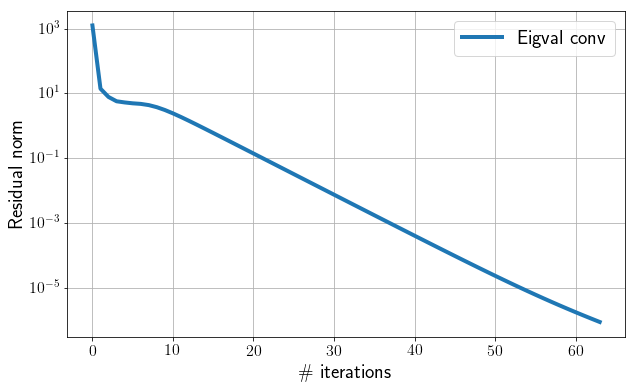

In [172]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

### Несимметричный случай

In [173]:
A = np.random.randn(n, n)

In [174]:
true_eigvals, true_eigvec = np.linalg.eig(A)
block_size = 5
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec)

[-2.45009699+1.68346263j -2.45009699-1.68346263j  0.47640561+2.29146648j
  0.47640561-2.29146648j  2.81844405+0.j          1.71599089+1.2697844j
  1.71599089-1.2697844j   1.23217234+0.j         -0.79004446+0.j
 -0.16341314+0.j        ]
[0.16341314 0.79004446 1.23217234 2.13470774 2.13470774 2.34046596
 2.34046596 2.81844405 2.97271285 2.97271285]
[[-0.56597271+0.j         -0.56597271-0.j          0.08403445-0.20110194j
   0.08403445+0.20110194j  0.15439007+0.j         -0.04780665+0.05218962j
  -0.04780665-0.05218962j  0.36717444+0.j          0.04613196+0.j
   0.11266519+0.j        ]
 [-0.27150185+0.00366465j -0.27150185-0.00366465j -0.07393614+0.20689953j
  -0.07393614-0.20689953j  0.52816269+0.j          0.20453457+0.03460165j
   0.20453457-0.03460165j -0.31108868+0.j          0.50049958+0.j
   0.46679097+0.j        ]
 [-0.0741458 -0.08890636j -0.0741458 +0.08890636j  0.17252194-0.29996338j
   0.17252194+0.29996338j  0.11666754+0.j         -0.01716278+0.19693281j
  -0.01716278-0.19693

In [175]:
x0 = np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.63504044 -0.43261081 -0.0343647  -0.29932097  0.06181619]
 [-0.30864525 -0.20355177 -0.4835405   0.37033423 -0.1073383 ]
 [ 0.0141157  -0.15311655 -0.08512166 -0.4903671   0.2185419 ]
 [ 0.44903917 -0.37827564  0.0354307  -0.10357275 -0.03932855]
 [ 0.1319768   0.05032971 -0.19994386 -0.42852529 -0.32588763]
 [-0.19979929  0.58652627  0.10402151 -0.46978956 -0.04017672]
 [ 0.02367831  0.47324539 -0.45359994  0.19391698  0.36820211]
 [ 0.47202697 -0.10351453 -0.3497285  -0.13346393 -0.12228502]
 [ 0.09417359 -0.02194783  0.58741017  0.17560499  0.2932875 ]
 [-0.10024912  0.15222716  0.18054077  0.17743343 -0.76875813]]
[-2.72030721 -2.17988677  2.81844405  1.01468731 -0.06187609]
[[ 0.11266519+0.j          0.04613196+0.j          0.36717444+0.j
  -0.04780665-0.05218962j -0.04780665+0.05218962j]
 [ 0.46679097+0.j          0.50049958+0.j         -0.31108868+0.j
   0.20453457-0.03460165j  0.20453457+0.03460165j]
 [ 0.18213601+0.j          0.05708468+0.j         -0.14738856+0.j
  -0.01

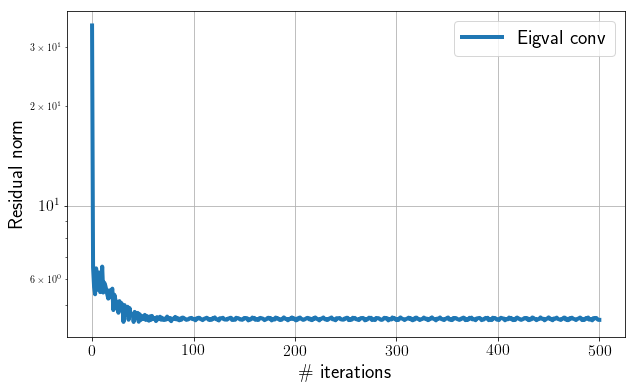

In [177]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

#### Какие собственные значения удаётся восстановить, а какие нет?

## QR алгоритм

- Приведение матрицы к форме Шура с помощью унитарных преобразований

$$ A = UTU^*, $$

$T$ – верхнетреугольная матрица.


In [281]:
def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [318]:
n = 7
A = np.random.randn(n, n)
# A = A.T @ A
# A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)

[-2.2373226 +0.j         -1.59459032+1.875539j   -1.59459032-1.875539j
  1.09403204+2.17057792j  1.09403204-2.17057792j  0.47895512+0.j
  1.01939263+0.j        ]


In [319]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

6.065074362914485e-13


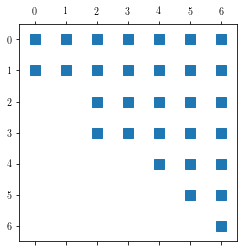

In [320]:
plt.spy(T, markersize=10, precision=1e-6)

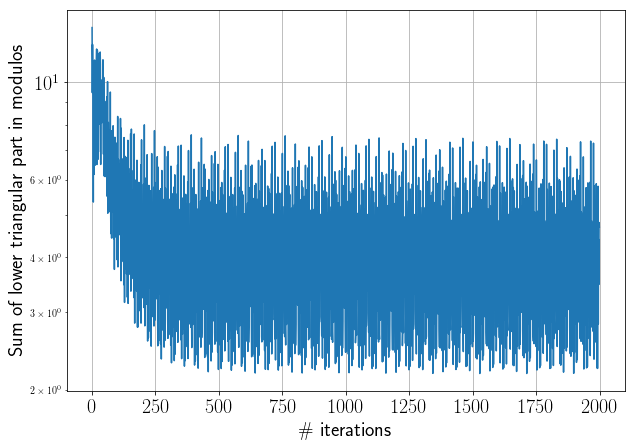

In [321]:
plt.figure(figsize=(10, 7))
conv_qr = np.array([np.sum(np.abs(np.tril(T, k=-1))) for T, U in conv])
plt.plot(conv_qr)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations", fontsize=20)
plt.ylabel("Sum of lower triangular part in modulos", fontsize=20)
plt.grid(True)

In [322]:
U.round(4), true_eigvec.round(4)

(array([[ 0.0856, -0.0952, -0.0133,  0.0311,  0.5832, -0.3341,  0.7285],
        [-0.3649, -0.7505,  0.289 , -0.4214,  0.0081, -0.1699, -0.1164],
        [ 0.2744,  0.0335, -0.4951, -0.6331,  0.4186,  0.1883, -0.2587],
        [-0.585 ,  0.2576, -0.4906, -0.0258, -0.0683, -0.5763, -0.1151],
        [ 0.2032, -0.1595, -0.3543, -0.2954, -0.6775,  0.0156,  0.511 ],
        [-0.4777,  0.477 ,  0.3285, -0.4471,  0.0091,  0.3758,  0.3086],
        [-0.4153, -0.3275, -0.4439,  0.3644,  0.1439,  0.5921,  0.1386]]),
 array([[ 5.002e-01+0.000e+00j, -9.730e-02-2.280e-02j,
         -9.730e-02+2.280e-02j, -6.290e-02-3.000e-04j,
         -6.290e-02+3.000e-04j,  2.626e-01+0.000e+00j,
         -5.600e-02+0.000e+00j],
        [-2.721e-01+0.000e+00j,  1.358e-01-3.611e-01j,
          1.358e-01+3.611e-01j,  3.228e-01-4.720e-02j,
          3.228e-01+4.720e-02j, -5.770e-02+0.000e+00j,
          2.500e-01+0.000e+00j],
        [ 1.720e-01+0.000e+00j, -2.303e-01+6.120e-02j,
         -2.303e-01-6.120e-02j,  2.6

## Вычисление степени матрицы

- Дана матрица $A$
- Нужно вычислить $A^k$
- Это будет необходимо при вычисление матричных функций, которые предстаыляются в виде матричного ряда

### Используем спектральное разложение

- $A = U\Lambda U^{-1}$
- Тогда $A^k = U \Lambda^k U^{-1}$

### Матричная экспонента: знакомство или напоминание

$$\exp(A) = \sum_{k=0}^{\infty} \frac{A^k}{k!} $$

- Про матричные функции будет отдельное занятие!
- Важно! Чаще нужно не само значение матричной экспоненты, а её произведение с некоторым вектором $v$: 

$$ \exp(A)v $$

- Это позволяет разработать быстрые методы для вычисления произведения, не считая саму матричную экспоненту!

In [363]:
import scipy.linalg as splin

n = 7
A = np.random.randn(n, n)
A = A + A.T
print(np.linalg.norm(A))
expA = splin.expm(A)
print(expA.round(4))

11.713737871062202
[[  26.3335   61.4017   -9.4933   19.7251   68.5355  107.1609  -26.828 ]
 [  61.4017  144.2879  -22.0147   46.8568  160.3281  250.8109  -65.118 ]
 [  -9.4933  -22.0147    9.3318   -7.3618  -24.0612  -44.0799    5.7606]
 [  19.7251   46.8568   -7.3618   15.5171   51.7916   81.4239  -22.1204]
 [  68.5355  160.3281  -24.0612   51.7916  178.8967  279.0472  -71.7641]
 [ 107.1609  250.8109  -44.0799   81.4239  279.0472  442.5184 -107.9649]
 [ -26.828   -65.118     5.7606  -22.1204  -71.7641 -107.9649   38.2619]]


In [364]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

1.4506803717862537e-13


In [369]:
cur_term = np.eye(n)
expA_approx = np.eye(n)
K = 50
denom = 1.
conv = [expA_approx]
for i in range(1, K):
    denom = denom * i
    cur_term = U @ T**i @ U.T / denom
    expA_approx = expA_approx + cur_term
    conv.append(expA_approx)
print(expA_approx.round(4))
print(np.linalg.norm(expA_approx - expA))

[[  26.3335   61.4017   -9.4933   19.7251   68.5355  107.1609  -26.828 ]
 [  61.4017  144.2879  -22.0147   46.8568  160.3281  250.8109  -65.118 ]
 [  -9.4933  -22.0147    9.3318   -7.3618  -24.0612  -44.08      5.7606]
 [  19.7251   46.8568   -7.3618   15.5172   51.7916   81.4239  -22.1204]
 [  68.5355  160.3281  -24.0612   51.7916  178.8967  279.0472  -71.7641]
 [ 107.1609  250.8109  -44.08     81.4239  279.0472  442.5184 -107.9649]
 [ -26.828   -65.118     5.7606  -22.1204  -71.7641 -107.9649   38.2619]]
8.340813914259584e-05


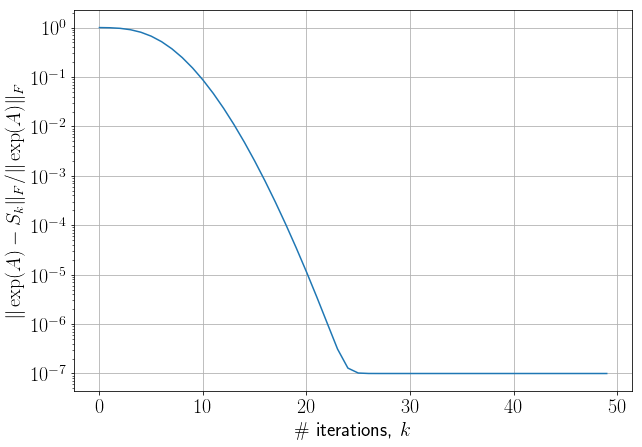

In [374]:
plt.figure(figsize=(10, 7))
plt.plot([np.linalg.norm(expA - approx, "fro") / np.linalg.norm(expA) for approx in conv])
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations, $k$", fontsize=20)
plt.ylabel("$\|\exp(A) - S_k \|_F / \|\exp(A)\|_F$", fontsize=20)
plt.grid(True)

## Стохастическая матрица и собственное значение равное 1

**Утверждение.** Пусть дана матрица $A$, в которой элементы неотрицательны и сумма в каждой строке рнавна 1.
Тогда 1 максимальное собственное значение такой матрицы.

**Доказательство.** 
- Возьмём вектор $v$ из всех 1 и вычислим $Av$. 
- В силу равенства 1 суммы элементов в каждой строке $Av$ также будет вектором из всех 1. 
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках $a_{ii}$ и радиусом $1 - a_{ii}$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1 

## Резюме

- Сходимость степенного метода
- Сходимость QR алгоритма
- Использование спектрального разложения для вычисления матричных рядов